# 01 – ψ and Output Simulation
This notebook simulates how norm-induced wage suppression (ψ) affects macroeconomic output using a Cobb–Douglas production function. We calculate GDP distortions across different ψ values.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Production function parameters
alpha = 0.6  # capital share (or male labor share here)
A = 1        # productivity (normalized) - holding technology shocks constant, allowing the study of only gender norm distortions.

# Labor inputs
L_m = 1.0    # male labour
L_f = 1.0    # female labour (unadjusted) - assuming that both groups have equal potential labour supply in the absence of friction.

# ψ values to test
psi_vals = np.linspace(0, 0.3, 100)  # ψ from 0 to 0.3 - a norm-induced productivity distortion. This would lead to a supression of female wages.
# Not due to a decrease in productivity, but this supression is caused by psychological or social norms. 
# Consider the effects of taste-based and/or statistical discrimination, or even a change attributable to institutional failure.

In [2]:
# Output with ψ applied to female labor
def output_with_psi(psi, A=1, alpha=0.6, L_m=1.0, L_f=1.0):
    return A * (L_m)**alpha * ((1 - psi) * L_f)**(1 - alpha)

# Compute outputs
Y_baseline = output_with_psi(psi=0)  # benchmark without friction
Y_suppressed = [output_with_psi(psi) for psi in psi_vals]

# Compute % output loss relative to baseline
GDP_loss_percent = [(1 - (y / Y_baseline)) * 100 for y in Y_suppressed]

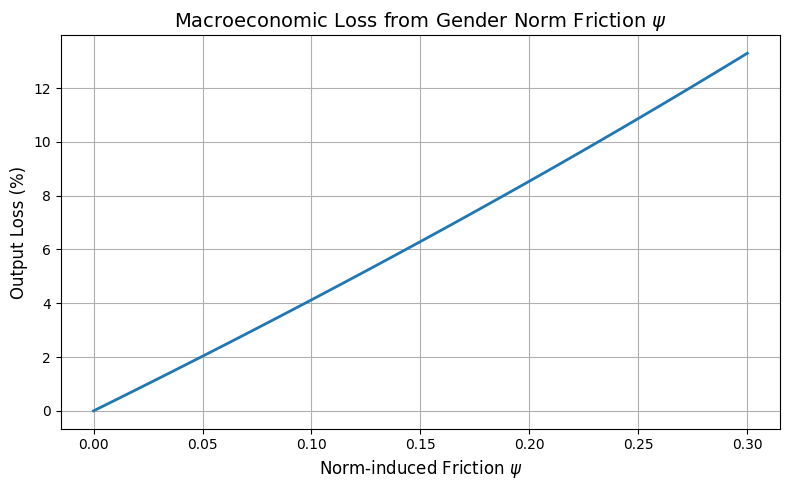

In [3]:
plt.figure(figsize=(8, 5))
plt.plot(psi_vals, GDP_loss_percent, linewidth=2)

plt.xlabel(r'Norm-induced Friction $\psi$', fontsize=12)
plt.ylabel('Output Loss (%)', fontsize=12)
plt.title(r'Macroeconomic Loss from Gender Norm Friction $\psi$', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
# For example: ψ = 0.1, α = 0.6
psi_example = 0.1
loss = 1 - output_with_psi(psi_example) / Y_baseline
print(f"For ψ = {psi_example}, GDP is reduced by approximately {loss*100:.2f}%")

For ψ = 0.1, GDP is reduced by approximately 4.13%
